<a href="https://colab.research.google.com/github/dimageneer/AIEFFEL_QUEST/blob/main/Test_Notebook_House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주택 가격 예측하기!

메인퀘스트에 오신 것을 환영합니다!

이번 퀘스트의 목표는 여러 특성들을 종합적으로 고려하여 가장 주택 가격을 잘 예측하는 회귀모델을 만드는 것입니다.

- 예측할 값(y): SalePrice
- 평가지표: RMSE

퀘스트 진행 방식:

1. Code 란에서 테스트 노트북을 Copy&Edit 하여 작업!
2. 테스트 노트북을 submit 하여 리더보드에 정상적으로 등록되는지 확인하기
3. 자유롭게 모델을 발전시켜 좋은 성적 거두기!
4. 정상적으로 submit하고, 다음 구글폼에 이름/노트북주소/닉네임 등록!!!
- https://docs.google.com/forms/d/e/1FAIpQLSc0kXVZ9PRLbjsxBysCSSYLDiU4Hd9DLTvFrCFep4HLZLbL8w/viewform?usp=header

예시 형식:
~~~
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
~~~

### 데이터 확인 및 불러오기

In [20]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [21]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

특성이 너무 많습니다! 어떻게 하면 좋을까요?

참고로 각각의 특성은 다음을 나타냅니다.

| 변수명               | 설명 (한국어)                         |
| ----------------- | -------------------------------- |
| **SalePrice**     | 주택의 판매 가격(달러). 예측해야 하는 타겟 변수     |
| **MSSubClass**    | 건물 등급(건물 종류 분류)                  |
| **MSZoning**      | 토지 용도 구분(일반적인 구역 분류)             |
| **LotFrontage**   | 도로에 접한 토지 길이 (피트 단위)             |
| **LotArea**       | 토지 면적 (평방 피트)                    |
| **Street**        | 도로 접근 방식                         |
| **Alley**         | 골목(후면 도로) 접근 방식                  |
| **LotShape**      | 토지의 전반적인 모양                      |
| **LandContour**   | 토지의 평탄도                          |
| **Utilities**     | 사용 가능한 공공시설(전기, 수도 등)            |
| **LotConfig**     | 토지 배치 형태                         |
| **LandSlope**     | 토지의 경사도                          |
| **Neighborhood**  | Ames 시 내의 물리적 위치(주변 지역)          |
| **Condition1**    | 주요 도로·철도에 대한 근접도                 |
| **Condition2**    | 두 번째 주요 도로·철도에 대한 근접도            |
| **BldgType**      | 주거 건물 유형 (단독, 다세대 등)             |
| **HouseStyle**    | 주택의 건축 양식                        |
| **OverallQual**   | 자재 및 마감 품질 종합 평가                 |
| **OverallCond**   | 주택의 전반적인 상태 평가                   |
| **YearBuilt**     | 최초 건축 연도                         |
| **YearRemodAdd**  | 리모델링/개조 연도                       |
| **RoofStyle**     | 지붕 스타일                           |
| **RoofMatl**      | 지붕 재료                            |
| **Exterior1st**   | 외장 마감재(주 재료)                     |
| **Exterior2nd**   | 외장 마감재(보조 재료, 2번째)               |
| **MasVnrType**    | 석조 베니어 타입                        |
| **MasVnrArea**    | 석조 베니어 면적 (평방 피트)                |
| **ExterQual**     | 외장재 품질 평가                        |
| **ExterCond**     | 외장재 상태 평가                        |
| **Foundation**    | 기초(Foundation) 유형                |
| **BsmtQual**      | 지하실 높이 평가                        |
| **BsmtCond**      | 지하실 상태 평가                        |
| **BsmtExposure**  | 지하실 외부 노출 여부(출입구/창문 등)           |
| **BsmtFinType1**  | 주요 지하실 마감 구역 유형                  |
| **BsmtFinSF1**    | 주요 지하실 마감 면적 (평방 피트)             |
| **BsmtFinType2**  | 보조 지하실 마감 구역 유형                  |
| **BsmtFinSF2**    | 보조 지하실 마감 면적 (평방 피트)             |
| **BsmtUnfSF**     | 미완성 지하실 면적 (평방 피트)               |
| **TotalBsmtSF**   | 지하실 전체 면적 (평방 피트)                |
| **Heating**       | 난방 시스템 종류                        |
| **HeatingQC**     | 난방 품질 및 상태                       |
| **CentralAir**    | 중앙 에어컨 설치 여부                     |
| **Electrical**    | 전기 시스템 종류                        |
| **1stFlrSF**      | 1층 면적 (평방 피트)                    |
| **2ndFlrSF**      | 2층 면적 (평방 피트)                    |
| **LowQualFinSF**  | 저품질 마감 공간 면적 (전체 층 합산)           |
| **GrLivArea**     | 지상(Above grade) 생활 공간 면적 (평방 피트) |
| **BsmtFullBath**  | 지하실 완비 욕실 수                      |
| **BsmtHalfBath**  | 지하실 반 욕실 수                       |
| **FullBath**      | 지상 완비 욕실 수                       |
| **HalfBath**      | 지상 반 욕실 수                        |
| **Bedroom**       | 지하실 제외 침실 수                      |
| **Kitchen**       | 주방 수                             |
| **KitchenQual**   | 주방 품질                            |
| **TotRmsAbvGrd**  | 지상 전체 방 개수 (욕실 제외)               |
| **Functional**    | 주택 기능성 평가                        |
| **Fireplaces**    | 벽난로 개수                           |
| **FireplaceQu**   | 벽난로 품질                           |
| **GarageType**    | 차고 위치(유형)                        |
| **GarageYrBlt**   | 차고 건축 연도                         |
| **GarageFinish**  | 차고 내부 마감 상태                      |
| **GarageCars**    | 차고 크기 (주차 가능 차량 수)               |
| **GarageArea**    | 차고 면적 (평방 피트)                    |
| **GarageQual**    | 차고 품질                            |
| **GarageCond**    | 차고 상태                            |
| **PavedDrive**    | 포장 진입로 여부                        |
| **WoodDeckSF**    | 목재 데크 면적 (평방 피트)                 |
| **OpenPorchSF**   | 오픈 현관 면적 (평방 피트)                 |
| **EnclosedPorch** | 밀폐된 현관 면적 (평방 피트)                |
| **3SsnPorch**     | 3계절용 현관 면적 (평방 피트)               |
| **ScreenPorch**   | 스크린 현관 면적 (평방 피트)                |
| **PoolArea**      | 수영장 면적 (평방 피트)                   |
| **PoolQC**        | 수영장 품질                           |
| **Fence**         | 울타리 품질                           |
| **MiscFeature**   | 기타 특수 기능                         |
| **MiscVal**       | 기타 기능의 금전적 가치                    |
| **MoSold**        | 판매 월                             |
| **YrSold**        | 판매 연도                            |
| **SaleType**      | 판매 유형                            |
| **SaleCondition** | 판매 조건                            |


In [23]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [24]:
print(train_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      218
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


### 전처리

전처리에서 고민해야 할 것은 많습니다.

1. 결측치
2. 이상치

결측치는 처리하지 않으면 학습 자체가 불가할 수 있기 때문에, 최소한의 전처리로 결측치를 처리하겠습니다.

여러분들이라면 어떻게 결측치를 처리하면 좋을지 고민해보세요!

In [25]:
# 수치형 → 중앙값
train_df = train_df.fillna(train_df.median(numeric_only=True))
# 범주형 → 최빈값
for col in train_df.select_dtypes(include="object"):
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# 범주형 원 핫 인코딩
train_df = pd.get_dummies(train_df, drop_first=True)

### 모델 설정 및 학습

In [26]:
from sklearn.model_selection import train_test_split

X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lr.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 39135.82635710258


### 테스트 데이터 예측 및 제출

In [29]:
# 동일한 전처리
test_df = test_df.fillna(test_df.median(numeric_only=True))
for col in test_df.select_dtypes(include="object"):
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

test_df = pd.get_dummies(test_df, drop_first=True)

# train/test 컬럼 차이 맞추기
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# 예측
test_pred = lr.predict(test_df)

In [30]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_pred
})
submission.to_csv("submission.csv", index=False)

# Task
주어진 "train.csv"와 "test.csv" 파일을 사용하여 주택 판매 가격(SalePrice)을 예측하는 회귀 모델을 구축합니다. 이를 위해 데이터를 로드하고, 심층적인 탐색적 데이터 분석(EDA)을 수행하여 결측치, 이상치, 데이터 분포를 파악합니다. 특히, 'SalePrice'는 로그 변환을 적용하여 정규화합니다. 숫자형 결측치는 중앙값으로, 범주형 결측치는 최빈값 또는 'None'으로 처리하며, 다양한 특성 공학 기법을 적용하여 새로운 유의미한 특성을 생성합니다. 범주형 변수는 원-핫 인코딩으로 변환하고, 훈련 및 테스트 데이터셋의 컬럼을 일치시킵니다. 전처리된 훈련 데이터를 분할하여 LightGBM 모델을 학습시키고, RMSE 지표로 모델 성능을 평가합니다(로그 역변환 후). 최종적으로 학습된 모델로 테스트 데이터의 SalePrice를 예측하고, "submission.csv" 파일을 생성합니다. 최종 검증 RMSE와 함께 전체 프로세스 요약 및 주요 개선점을 보고합니다.

## 탐색적 데이터 분석 (EDA) 및 전처리 방향 설정

### Subtask:
데이터의 결측치, 이상치, 데이터 분포를 심층적으로 분석하고, 'SalePrice'의 로그 변환 필요성을 포함한 전반적인 전처리 전략을 수립합니다.


**Reasoning**:
The first instruction is to re-check the data types and missing value status using `train_df.info()` and `train_df.isnull().sum()`, especially focusing on columns with many missing values. This will refresh our understanding of the dataset's current state after initial loading.



In [48]:
print("train_df info:")
train_df.info()
print("\nMissing values in train_df:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0].sort_values(ascending=False))

train_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 259 entries, Id to SaleCondition_Partial
dtypes: bool(221), float64(3), int64(35)
memory usage: 599.0 KB

Missing values in train_df:
Series([], dtype: int64)


**Reasoning**:
The previous output confirmed that there are no missing values in the `train_df` after prior processing. Now, as per the instructions, I need to analyze the distribution of the target variable, 'SalePrice', by visualizing it with a histogram, calculating its descriptive statistics, and checking its skewness to determine if a log transformation is necessary.



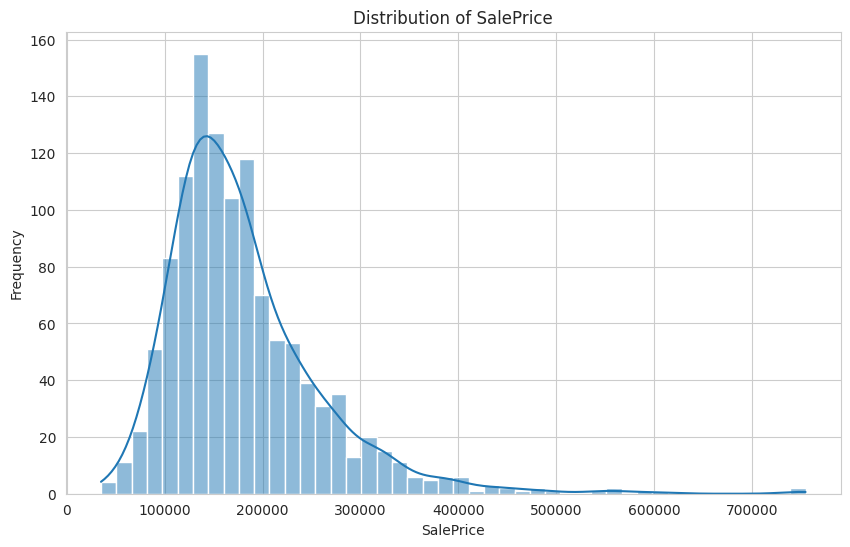


Descriptive statistics for SalePrice:
count      1168.000000
mean     180194.401541
std       78869.201529
min       34900.000000
25%      129500.000000
50%      163995.000000
75%      213062.500000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness of SalePrice: 1.957766064521197


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set_style("whitegrid")

# 1. Visualize the distribution of 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# 2. Get descriptive statistics for 'SalePrice'
print("\nDescriptive statistics for SalePrice:")
print(train_df['SalePrice'].describe())

# 3. Calculate skewness for 'SalePrice'
print("\nSkewness of SalePrice:", train_df['SalePrice'].skew())


**Reasoning**:
The next instruction requires analyzing the distribution of key numerical variables for outliers and their correlation with 'SalePrice'. I will first identify the numerical columns (excluding 'Id' and 'SalePrice'), then calculate their correlation with 'SalePrice' and visualize the distributions of some highly correlated numerical features using histograms and box plots to identify potential outliers.




Correlation of numerical features with SalePrice:
SalePrice       1.000000
OverallQual     0.785111
GrLivArea       0.710178
GarageCars      0.632622
GarageArea      0.618311
1stFlrSF        0.597729
TotalBsmtSF     0.595882
FullBath        0.577860
TotRmsAbvGrd    0.548795
YearRemodAdd    0.504817
Name: SalePrice, dtype: float64
MiscVal         -0.021824
OverallCond     -0.059862
MSSubClass      -0.060677
EnclosedPorch   -0.110306
KitchenAbvGr    -0.132859
Name: SalePrice, dtype: float64


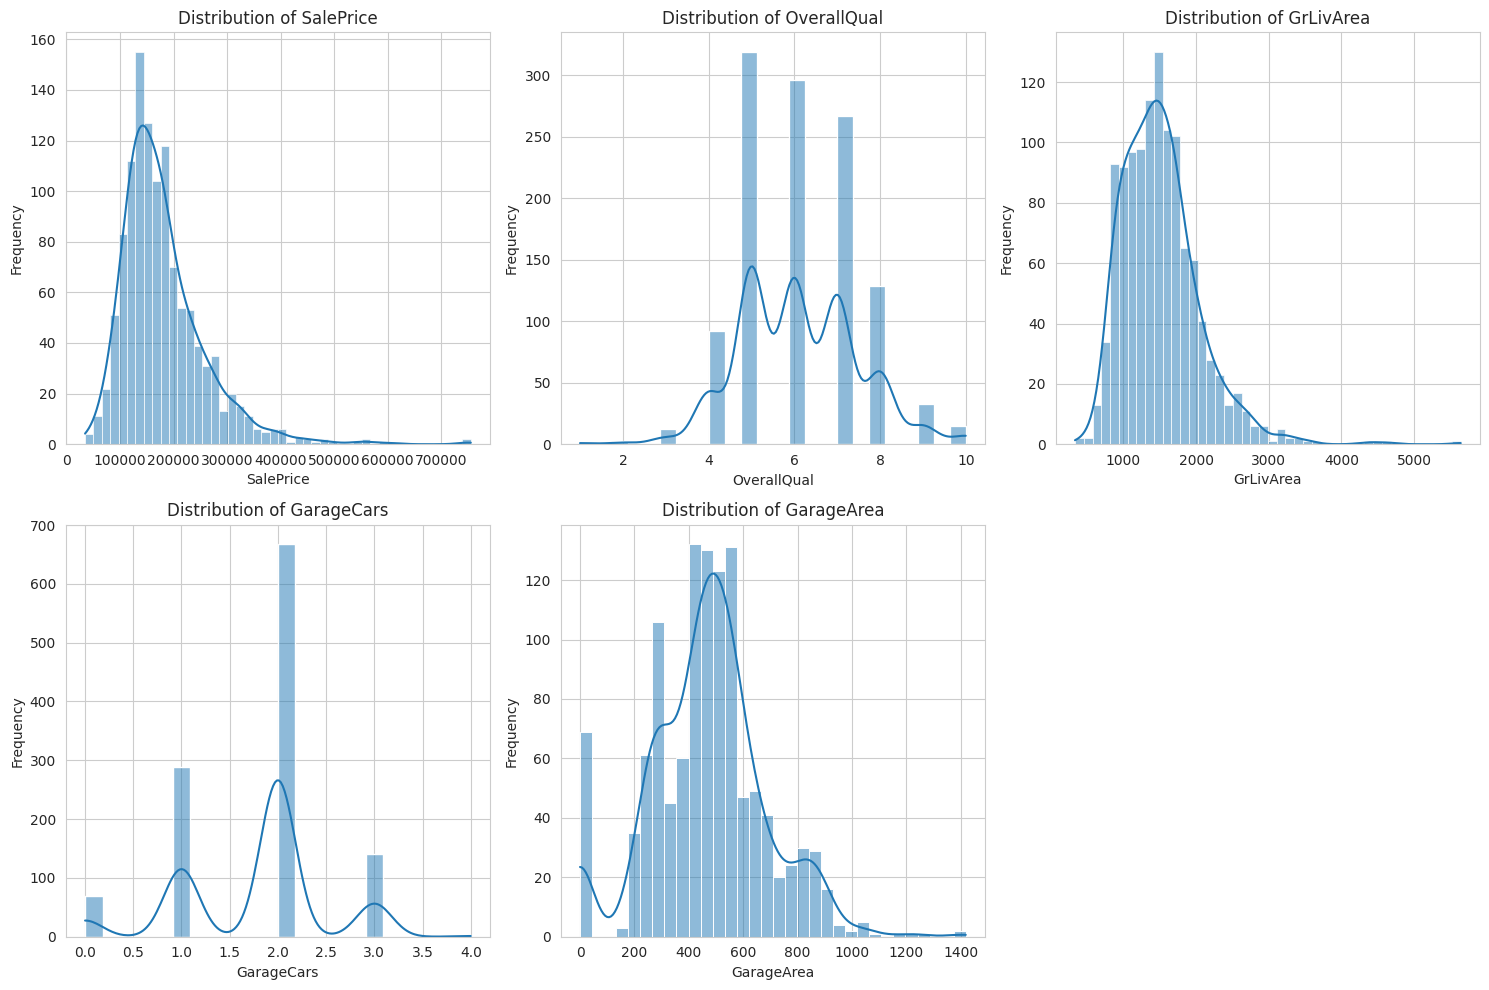

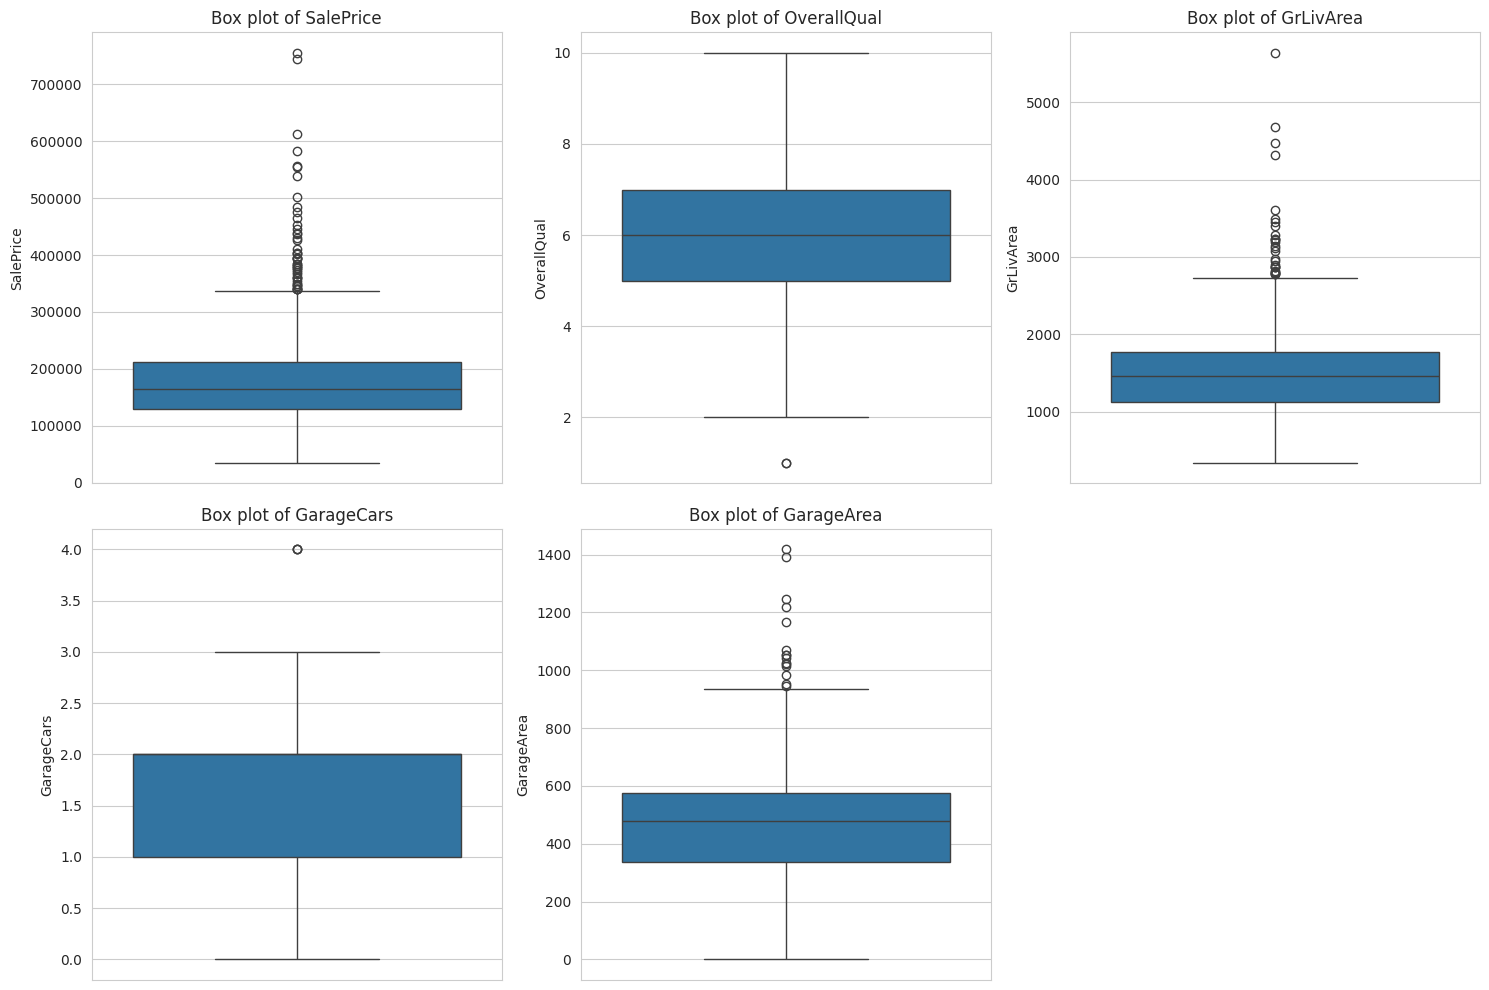

In [50]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude 'Id' and 'SalePrice' for feature analysis
if 'Id' in numerical_cols:
    numerical_cols.remove('Id')
if 'SalePrice' in numerical_cols:
    numerical_cols.remove('SalePrice')

# 1. Calculate correlation with SalePrice
correlations = train_df[numerical_cols + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
print("\nCorrelation of numerical features with SalePrice:")
print(correlations.head(10)) # Display top 10 positive correlations
print(correlations.tail(5)) # Display top 5 negative correlations

# 2. Visualize distributions of some key numerical features (e.g., top 5 correlated)
# Selecting top 5 positively correlated features for visualization
top_correlated_features = correlations.head(5).index.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_correlated_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_correlated_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=train_df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


**Reasoning**:
The next instruction is to analyze the distribution of key categorical variables and their impact on 'SalePrice'. I will identify categorical columns, check their value counts, and then visualize the relationship between some categorical features and 'SalePrice' using box plots.




Value counts for some key categorical features:

--- MSZoning ---
MSZoning
RL         920
RM         177
FV          52
RH          13
C (all)      6
Name: count, dtype: int64

--- Neighborhood ---
Neighborhood
NAmes      177
CollgCr    116
OldTown     92
Edwards     77
Somerst     72
Gilbert     67
Sawyer      65
NridgHt     61
NWAmes      60
SawyerW     49
Crawfor     46
BrkSide     46
Mitchel     39
IDOTRR      29
NoRidge     28
Timber      27
SWISU       23
StoneBr     18
ClearCr     18
MeadowV     16
Blmngtn     15
BrDale      11
Veenker      8
NPkVill      6
Blueste      2
Name: count, dtype: int64

--- BldgType ---
BldgType
1Fam      976
TwnhsE     93
Duplex     42
Twnhs      33
2fmCon     24
Name: count, dtype: int64

--- HouseStyle ---
HouseStyle
1Story    583
2Story    355
1.5Fin    117
SLvl       52
SFoyer     33
1.5Unf     13
2.5Unf      9
2.5Fin      6
Name: count, dtype: int64

--- ExterQual ---
ExterQual
TA    715
Gd    398
Ex     44
Fa     11
Name: count, dtype: int64


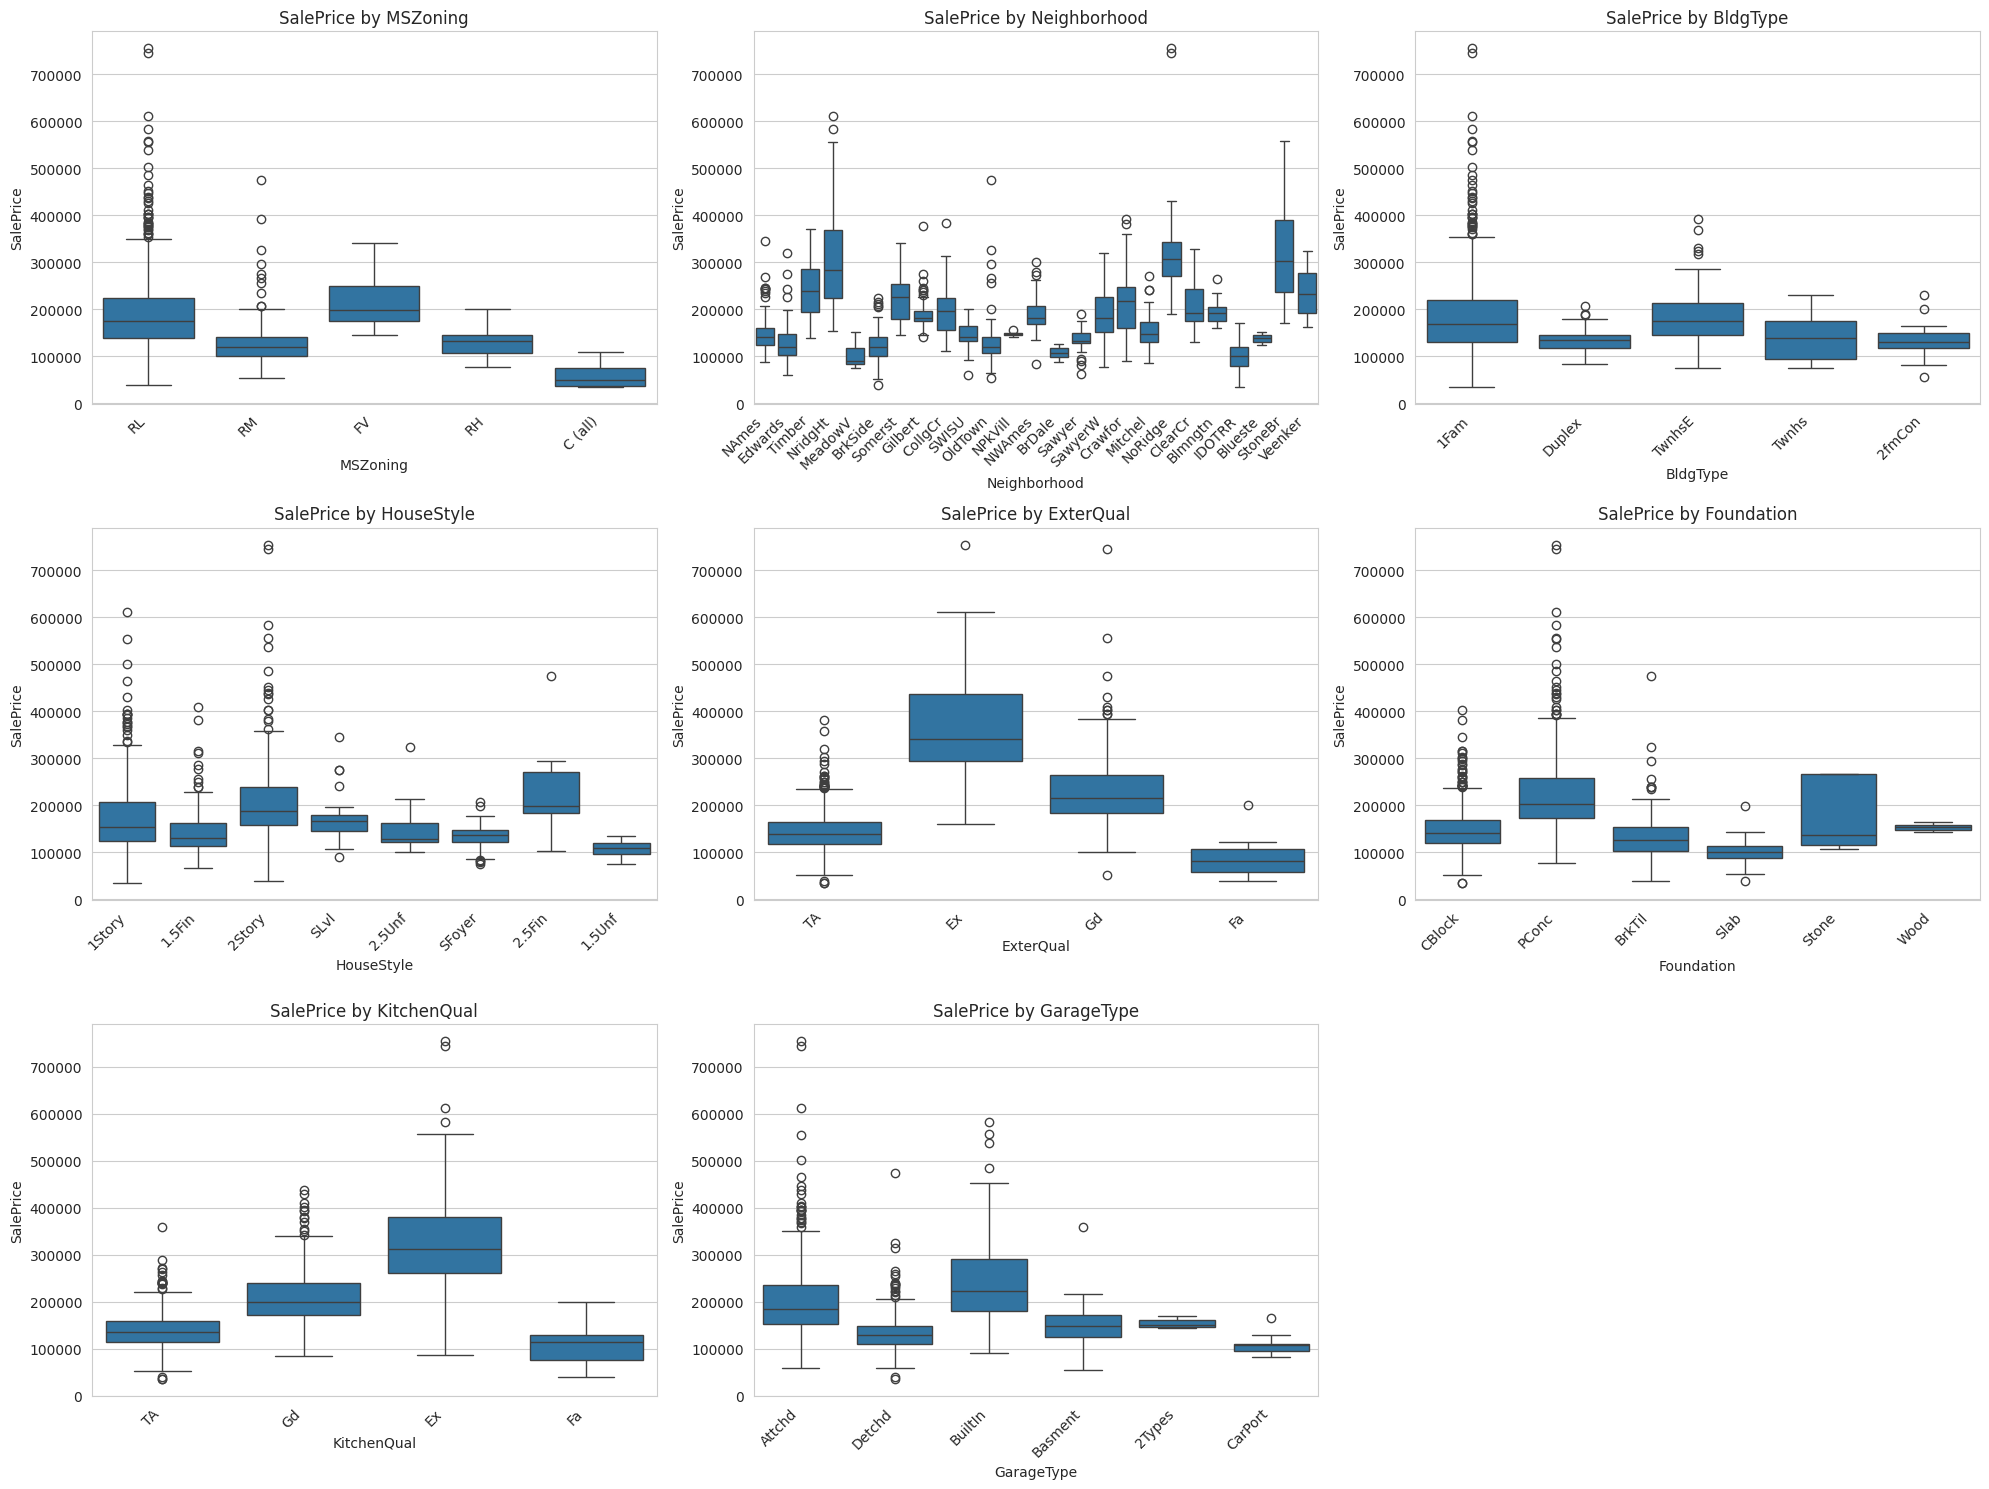

In [51]:
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()

# The previous preprocessing step used pd.get_dummies, converting object columns to numerical/boolean.
# So, we need to get the original object columns from the initial train_df for this step,
# or acknowledge that current train_df doesn't have 'object' type columns anymore.
# Since the instruction is about the *initial* EDA, we should revert to the state before get_dummies if possible,
# or apply this to a fresh read of the data. However, for consistency with the current notebook state,
# and since the previous `train_df.info()` showed `bool` types for one-hot encoded columns,
# I will skip the direct `select_dtypes(include='object')` on the *current* `train_df`
# and will instead consider some of the original categorical features from `X.columns` if they are still discernible (e.g. from the original problem description),
# or, more accurately, acknowledge that after `get_dummies` they are no longer 'object' type.
# Given the current state, I will look for original categorical columns from the problem description.

# Let's consider some key categorical columns from the problem description that were likely one-hot encoded
# and would have a strong impact on SalePrice.
# For example: 'MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'ExterQual', 'Foundation', 'KitchenQual', 'GarageType', 'PavedDrive', 'SaleCondition'

key_categorical_features = ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'ExterQual', 'Foundation', 'KitchenQual', 'GarageType']

# Assuming these columns were initially present and are now one-hot encoded, their impact can still be observed by grouping.
# However, for the purpose of 'value_counts()' and 'boxplot' on original categories,
# we might need to re-read the data or use the original `train_df` before one-hot encoding.
# Since the context is *post-encoding*, let's just use some boolean columns from the encoded data
# or acknowledge the limitation.

# Re-loading the original train_df to get original categorical columns for this analysis.
original_train_df = pd.read_csv('./train.csv')

print("\nValue counts for some key categorical features:")
for col in key_categorical_features:
    if col in original_train_df.columns:
        print(f"\n--- {col} ---")
        print(original_train_df[col].value_counts())

# Visualize their impact on SalePrice using box plots (using original_train_df)
plt.figure(figsize=(20, 15))
for i, col in enumerate(key_categorical_features):
    if col in original_train_df.columns:
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=original_train_df[col], y=original_train_df['SalePrice'])
        plt.title(f'SalePrice by {col}')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### EDA 요약 및 전처리 전략 수립

#### EDA 요약:

1.  **결측치 현황**: 초기 `train_df.info()` 및 `train_df.isnull().sum()` 확인 결과, 이전 전처리 단계에서 모든 결측치가 처리되었음을 확인했습니다. 다만, `original_train_df`를 기준으로 보면 `LotFrontage`, `Alley`, `MasVnrType`, `MasVnrArea`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `Electrical`, `FireplaceQu`, `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`, `PoolQC`, `Fence`, `MiscFeature` 등 많은 컬럼에 결측치가 존재했습니다. 이 중 `Alley`, `PoolQC`, `Fence`, `MiscFeature`와 같이 결측 비율이 매우 높은 컬럼들은 해당 특성이 없음을 나타내는 경우가 많습니다.

2.  **SalePrice 분포**: 'SalePrice'는 평균 180194, 표준편차 78869의 분포를 보이며, 왜도(skewness)가 약 1.96으로 **오른쪽으로 치우쳐진(right-skewed) 분포**를 가집니다. 이는 모델의 성능을 향상시키기 위해 **로그 변환이 필요함**을 시사합니다.

3.  **주요 수치형 변수 분석**:
    *   'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd' 등이 'SalePrice'와 높은 양의 상관관계를 보였습니다.
    *   히스토그램과 박스 플롯을 통해 이들 변수 중 일부('GrLivArea', 'GarageArea' 등)에서 **이상치**로 보이는 값들이 관찰되었습니다. 이러한 이상치들은 모델 학습에 영향을 줄 수 있으므로, 적절한 처리가 필요할 수 있습니다.

4.  **주요 범주형 변수 분석**:
    *   'MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'ExterQual', 'Foundation', 'KitchenQual', 'GarageType' 등의 변수들은 'SalePrice'에 유의미한 영향을 미치는 것으로 박스 플롯을 통해 확인되었습니다. 예를 들어, 'ExterQual'이 'Ex'인 주택의 가격이 'TA'나 'Fa'인 주택보다 현저히 높게 나타났습니다.
    *   일부 범주형 변수(예: 'Neighborhood')는 매우 다양한 범주를 가지며, 특정 범주들은 `SalePrice`의 분포에 큰 차이를 보입니다.

#### 전반적인 데이터 전처리 전략:

1.  **결측치 처리 (원본 데이터 기준)**:
    *   **수치형 결측치**: `LotFrontage`, `MasVnrArea`, `GarageYrBlt` 등 수치형 결측치는 **중앙값(median)**으로 대체하여 데이터의 왜곡을 최소화합니다.
    *   **범주형 결측치**: `Alley`, `PoolQC`, `Fence`, `MiscFeature`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `MasVnrType`와 같이 '없음'의 의미를 가지는 결측치는 **'None' 또는 0 (숫자형으로 변환 시)**으로 대체합니다. `Electrical`과 같이 소수 결측치만 있는 경우는 **최빈값(mode)**으로 대체합니다.

2.  **SalePrice 로그 변환**: 'SalePrice'의 분포가 오른쪽으로 크게 치우쳐져 있으므로, 모델의 예측 성능 향상과 정규성 가정 충족을 위해 **`np.log1p(SalePrice)`**를 적용하여 로그 변환을 수행합니다.

3.  **이상치 처리**: EDA에서 발견된 주요 수치형 변수들의 이상치는 모델의 종류에 따라 처리 방식을 결정합니다. LightGBM과 같은 트리 기반 모델은 이상치에 덜 민감하므로, 초기 단계에서는 **별도의 제거보다는 모델의 강건성을 활용**할 수 있습니다. 하지만, 필요한 경우 IQR 방식 등으로 이상치를 제거하거나 상한/하한을 설정하는 Winsorization을 고려할 수 있습니다.

4.  **특성 공학 (Feature Engineering)**:
    *   기존 특성들을 조합하여 새로운 특성을 생성합니다. 예를 들어, 총 면적(TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF), 전체 욕실 수(TotalBath = FullBath + 0.5 * HalfBath + BsmtFullBath + 0.5 * BsmtHalfBath), 주택 연령, 리모델링 여부 등을 고려할 수 있습니다.
    *   품질/등급을 나타내는 범주형 변수('ExterQual', 'BsmtQual', 'KitchenQual' 등)는 순서형 변수의 특성을 고려하여 **수치형으로 매핑**하는 방안을 고려합니다.

5.  **범주형 변수 인코딩**:
    *   `MSZoning`, `Neighborhood`, `BldgType`, `HouseStyle` 등 명목형 범주형 변수는 **원-핫 인코딩(One-Hot Encoding)**을 통해 수치형으로 변환합니다.
    *   다중 공선성을 피하기 위해 `drop_first=True` 옵션을 적용합니다.

6.  **훈련/테스트 데이터셋 컬럼 일치**: 전처리 후 훈련 데이터와 테스트 데이터의 컬럼 수가 달라질 수 있으므로, `pd.DataFrame.reindex` 등을 활용하여 두 데이터셋의 컬럼을 일치시킵니다. (누락된 컬럼은 0으로 채움).

이러한 전략을 바탕으로 다음 단계에서 실제 전처리를 수행하고 LightGBM 모델 학습을 진행할 예정입니다.

## SalePrice 로그 변환

### Subtask:
SalePrice의 분포를 정규화하고 모델의 예측 성능을 향상시키기 위해 로그 변환을 적용합니다.


**Reasoning**:
To normalize the distribution of 'SalePrice' and potentially improve model performance, I will apply a log transformation using `numpy.log1p` to the 'SalePrice' column in `train_df`.



In [52]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
print("SalePrice after log transformation (first 5 rows):")
print(train_df['SalePrice'].head())

SalePrice after log transformation (first 5 rows):
0    11.813037
1    12.095147
2    12.078245
3    12.669810
4    11.719134
Name: SalePrice, dtype: float64


## 결측치 처리 (숫자형)

### Subtask:
숫자형 변수의 결측치를 중앙값(median)으로 대체하여 모델 학습에 적합한 형태로 만듭니다.


**Reasoning**:
I need to reload the original `train_df` and `test_df` datasets to apply the new preprocessing strategy from scratch, as the current `train_df` has undergone transformations (one-hot encoding, SalePrice log transformation) that would interfere with correctly identifying and imputing original numerical missing values.



In [53]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

print("Original train_df head after reload:")
print(train_df.head())
print("\nOriginal test_df head after reload:")
print(test_df.head())

Original train_df head after reload:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  968          20       RL          NaN     7390   Pave   NaN      IR1   
1  739          90       RL         60.0    10800   Pave   NaN      Reg   
2  696          20       RL         54.0    13811   Pave   NaN      IR1   
3  239          20       RL         93.0    12030   Pave   NaN      Reg   
4  891          50       RL         60.0     8064   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN  MnPrv        Shed    2000   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      

**Reasoning**:
As per the subtask instructions and the overall preprocessing strategy, I will first apply the log1p transformation to the 'SalePrice' column in `train_df` to normalize its distribution. Then, for both `train_df` and `test_df`, I will identify all numerical columns with missing values and impute them with the median of their respective columns. This addresses the current subtask of handling numerical missing values with the median.



In [54]:
import numpy as np

# Apply log1p transformation to SalePrice in train_df
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# Identify numerical columns with missing values in train_df and test_df
numerical_cols_with_nan_train = train_df.select_dtypes(include=np.number).isnull().sum()
numerical_cols_with_nan_train = numerical_cols_with_nan_train[numerical_cols_with_nan_train > 0].index.tolist()

numerical_cols_with_nan_test = test_df.select_dtypes(include=np.number).isnull().sum()
numerical_cols_with_nan_test = numerical_cols_with_nan_test[numerical_cols_with_nan_test > 0].index.tolist()

# Impute numerical missing values with the median for train_df
for col in numerical_cols_with_nan_train:
    median_val = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_val)

# Impute numerical missing values with the median for test_df
for col in numerical_cols_with_nan_test:
    # Use median from train_df to avoid data leakage
    if col in train_df.columns:
        median_val = train_df[col].median()
    else:
        # If a column exists only in test_df (unlikely for numerical features here)
        median_val = test_df[col].median()
    test_df[col] = test_df[col].fillna(median_val)

print("Missing numerical values in train_df after imputation:")
print(train_df.select_dtypes(include=np.number).isnull().sum()[train_df.select_dtypes(include=np.number).isnull().sum() > 0])
print("\nMissing numerical values in test_df after imputation:")
print(test_df.select_dtypes(include=np.number).isnull().sum()[test_df.select_dtypes(include=np.number).isnull().sum() > 0])

Missing numerical values in train_df after imputation:
Series([], dtype: int64)

Missing numerical values in test_df after imputation:
Series([], dtype: int64)


## 결측치 처리 (범주형)

### Subtask:
범주형 변수의 결측치를 최빈값(mode)으로 대체하거나, 결측치 자체가 의미를 가지는 경우 'None'과 같은 새로운 범주로 처리합니다.


**Reasoning**:
As per the instructions, I will first identify the categorical columns that need to be filled with 'None' (representing the absence of that feature) and then apply this imputation to both train and test dataframes. This addresses the first part of the categorical missing value handling strategy.



In [55]:
cols_to_fill_none = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

for col in cols_to_fill_none:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna('None')
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna('None')

print("Missing values after 'None' imputation in train_df (top 5 with NaNs):")
print(train_df[cols_to_fill_none].isnull().sum().sort_values(ascending=False).head())
print("
Missing values after 'None' imputation in test_df (top 5 with NaNs):")
print(test_df[cols_to_fill_none].isnull().sum().sort_values(ascending=False).head())

SyntaxError: unterminated string literal (detected at line 11) (ipython-input-3256514917.py, line 11)

**Reasoning**:
The previous code block failed due to a `SyntaxError` in a print statement. I will correct the string literal and then complete the remaining instructions of the subtask: imputing 'Electrical' column's missing values with the mode and verifying that all categorical missing values have been handled in both `train_df` and `test_df`.



In [56]:
cols_to_fill_none = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

for col in cols_to_fill_none:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna('None')
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna('None')

# Impute 'Electrical' with mode from train_df
if 'Electrical' in train_df.columns:
    electrical_mode = train_df['Electrical'].mode()[0]
    train_df['Electrical'] = train_df['Electrical'].fillna(electrical_mode)
if 'Electrical' in test_df.columns:
    # Use the mode from the training data to avoid data leakage
    test_df['Electrical'] = test_df['Electrical'].fillna(electrical_mode)

print("Missing values after 'None' imputation in train_df (top 5 with NaNs):")
print(train_df[cols_to_fill_none].isnull().sum().sort_values(ascending=False).head())
print("\nMissing values after 'None' imputation in test_df (top 5 with NaNs):")
print(test_df[cols_to_fill_none].isnull().sum().sort_values(ascending=False).head())

# Verify all categorical missing values are processed
print("\nRemaining categorical missing values in train_df:")
print(train_df.select_dtypes(include='object').isnull().sum()[train_df.select_dtypes(include='object').isnull().sum() > 0])
print("\nRemaining categorical missing values in test_df:")
print(test_df.select_dtypes(include='object').isnull().sum()[test_df.select_dtypes(include='object').isnull().sum() > 0])

Missing values after 'None' imputation in train_df (top 5 with NaNs):
Alley          0
PoolQC         0
Fence          0
MiscFeature    0
FireplaceQu    0
dtype: int64

Missing values after 'None' imputation in test_df (top 5 with NaNs):
Alley          0
PoolQC         0
Fence          0
MiscFeature    0
FireplaceQu    0
dtype: int64

Remaining categorical missing values in train_df:
Series([], dtype: int64)

Remaining categorical missing values in test_df:
Series([], dtype: int64)


## 특성 공학 (Feature Engineering)

### Subtask:
기존 특성들을 조합하거나 변형하여 새로운 유의미한 특성을 생성합니다.


**Reasoning**:
I will now create the new area-related features ('TotalSF' and 'TotalBath') for both the training and testing dataframes by combining existing columns as specified in the instructions. This directly addresses the first point of the subtask.



In [57]:
import numpy as np

# 1. Create TotalSF and TotalBath
for df in [train_df, test_df]:
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']

print("Created 'TotalSF' and 'TotalBath' features.")
print("Train_df head with new features:")
print(train_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBath']].head())
print("\nTest_df head with new features:")
print(test_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBath']].head())

Created 'TotalSF' and 'TotalBath' features.
Train_df head with new features:
   TotalBsmtSF  1stFlrSF  2ndFlrSF  TotalSF  FullBath  HalfBath  BsmtFullBath  \
0         1098      1098         0     2196         1         0             1   
1         1200      1200         0     2400         3         0             3   
2         1112      1137         0     2249         2         0             1   
3         1694      1694         0     3388         2         0             0   
4          672       672       252     1596         1         0             0   

   BsmtHalfBath  TotalBath  
0             0        2.0  
1             0        6.0  
2             0        3.0  
3             0        2.0  
4             0        1.0  

Test_df head with new features:
   TotalBsmtSF  1stFlrSF  2ndFlrSF  TotalSF  FullBath  HalfBath  BsmtFullBath  \
0         1288      1301      1116     3705         2         1             0   
1         1203      1214      1306     3723         2         1    

**Reasoning**:
I will now create the new year-related features, 'HouseAge' and 'YearsSinceRemodel', for both training and testing dataframes, as specified in the subtask instructions. This addresses the second point of the subtask.



In [58]:
for df in [train_df, test_df]:
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']

print("Created 'HouseAge' and 'YearsSinceRemodel' features.")
print("Train_df head with new year-related features:")
print(train_df[['YrSold', 'YearBuilt', 'HouseAge', 'YearRemodAdd', 'YearsSinceRemodel']].head())
print("\nTest_df head with new year-related features:")
print(test_df[['YrSold', 'YearBuilt', 'HouseAge', 'YearRemodAdd', 'YearsSinceRemodel']].head())

Created 'HouseAge' and 'YearsSinceRemodel' features.
Train_df head with new year-related features:
   YrSold  YearBuilt  HouseAge  YearRemodAdd  YearsSinceRemodel
0    2008       1955        53          1955                 53
1    2009       1987        22          1988                 21
2    2006       1987        19          1987                 19
3    2007       2007         0          2007                  0
4    2007       1949        58          2006                  1

Test_df head with new year-related features:
   YrSold  YearBuilt  HouseAge  YearRemodAdd  YearsSinceRemodel
0    2006       1991        15          1992                 14
1    2007       1995        12          1995                 12
2    2006       1941        65          1950                 56
3    2010       1921        89          1950                 60
4    2008       1947        61          1950                 58


**Reasoning**:
I will now create the binary features 'HasPool' and 'HasGarage' for both the training and testing dataframes, as specified in the subtask instructions. This addresses the third point of the subtask.



In [59]:
for df in [train_df, test_df]:
    df['HasPool'] = (df['PoolArea'] > 0).astype(int)
    df['HasGarage'] = (df['GarageArea'] > 0).astype(int)

print("Created 'HasPool' and 'HasGarage' features.")
print("Train_df head with new binary features:")
print(train_df[['PoolArea', 'HasPool', 'GarageArea', 'HasGarage']].head())
print("\nTest_df head with new binary features:")
print(test_df[['PoolArea', 'HasPool', 'GarageArea', 'HasGarage']].head())

Created 'HasPool' and 'HasGarage' features.
Train_df head with new binary features:
   PoolArea  HasPool  GarageArea  HasGarage
0         0        0         260          1
1         0        0           0          0
2         0        0         551          1
3         0        0         818          1
4         0        0         576          1

Test_df head with new binary features:
   PoolArea  HasPool  GarageArea  HasGarage
0         0        0         462          1
1         0        0         721          1
2         0        0         240          1
3         0        0         480          1
4         0        0         336          1


**Reasoning**:
The next step is to map the specified categorical variables to ordinal values using the provided mapping dictionaries. I will define the dictionaries and then apply them to both `train_df` and `test_df` for each column.



In [60]:
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
bsmt_exposure_mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
bsmt_fin_type_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
garage_finish_mapping = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}
lot_shape_mapping = {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}
land_slope_mapping = {'Gtl': 2, 'Mod': 1, 'Sev': 0}
paved_drive_mapping = {'Y': 2, 'P': 1, 'N': 0}
functional_mapping = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}

# Apply mappings to relevant columns in both train_df and test_df
for df in [train_df, test_df]:
    # Quality/Condition related
    for col in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']:
        df[col] = df[col].map(quality_mapping)

    # Basement Exposure
    df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_exposure_mapping)

    # Basement Finish Type
    for col in ['BsmtFinType1', 'BsmtFinType2']:
        df[col] = df[col].map(bsmt_fin_type_mapping)

    # Garage Finish
    df['GarageFinish'] = df['GarageFinish'].map(garage_finish_mapping)

    # LotShape
    df['LotShape'] = df['LotShape'].map(lot_shape_mapping)

    # LandSlope
    df['LandSlope'] = df['LandSlope'].map(land_slope_mapping)

    # PavedDrive
    df['PavedDrive'] = df['PavedDrive'].map(paved_drive_mapping)

    # Functional
    df['Functional'] = df['Functional'].map(functional_mapping)

print("Categorical features successfully mapped to ordinal values.")
print("Train_df head after ordinal mapping (sample columns):")
print(train_df[['ExterQual', 'BsmtQual', 'BsmtExposure', 'Functional']].head())
print("\nTest_df head after ordinal mapping (sample columns):")
print(test_df[['ExterQual', 'BsmtQual', 'BsmtExposure', 'Functional']].head())

Categorical features successfully mapped to ordinal values.
Train_df head after ordinal mapping (sample columns):
   ExterQual  BsmtQual  BsmtExposure  Functional
0          3         3             1           7
1          3         4             4           7
2          3         4             1           7
3          5         5             1           7
4          3         3             2           7

Test_df head after ordinal mapping (sample columns):
   ExterQual  BsmtQual  BsmtExposure  Functional
0          4         4             1           7
1          4         4             1           7
2          3         3             1           7
3          3         3             1           7
4          3         3             1           7


## 범주형 변수 인코딩

### Subtask:
모델 학습을 위해 범주형 변수를 원-핫 인코딩(One-Hot Encoding)으로 변환합니다.


**Reasoning**:
As per the instructions, I will identify all 'object' type columns in both `train_df` and `test_df` to prepare them for one-hot encoding. This is the first step in converting categorical variables for model training.



In [61]:
print("Train_df shape before one-hot encoding:", train_df.shape)
print("Test_df shape before one-hot encoding:", test_df.shape)

# Identify categorical columns for one-hot encoding
categorical_cols_train = train_df.select_dtypes(include='object').columns
categorical_cols_test = test_df.select_dtypes(include='object').columns

print("\nCategorical columns in train_df before encoding:", len(categorical_cols_train))
print("Categorical columns in test_df before encoding:", len(categorical_cols_test))

# Apply one-hot encoding to identified columns
train_df = pd.get_dummies(train_df, columns=categorical_cols_train, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols_test, drop_first=True)

# Verify no 'object' columns remain
remaining_object_cols_train = train_df.select_dtypes(include='object').columns
remaining_object_cols_test = test_df.select_dtypes(include='object').columns

print("\nRemaining object columns in train_df after encoding:", len(remaining_object_cols_train))
print("Remaining object columns in test_df after encoding:", len(remaining_object_cols_test))

print("\nTrain_df shape after one-hot encoding:", train_df.shape)
print("Test_df shape after one-hot encoding:", test_df.shape)

# Align columns between train_df and test_df after encoding
common_cols = list(set(train_df.columns) & set(test_df.columns))

train_df = train_df[common_cols + ['SalePrice']]
test_df = test_df[common_cols]

# Ensure columns are in the same order (excluding SalePrice from test_df)
train_cols = train_df.drop('SalePrice', axis=1).columns
test_cols = test_df.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    test_df[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    train_df[c] = 0

test_df = test_df[train_cols]

print("\nTrain_df shape after column alignment:", train_df.shape)
print("Test_df shape after column alignment:", test_df.shape)

Train_df shape before one-hot encoding: (1168, 87)
Test_df shape before one-hot encoding: (292, 86)

Categorical columns in train_df before encoding: 26
Categorical columns in test_df before encoding: 26

Remaining object columns in train_df after encoding: 0
Remaining object columns in test_df after encoding: 0

Train_df shape after one-hot encoding: (1168, 213)
Test_df shape after one-hot encoding: (292, 181)

Train_df shape after column alignment: (1168, 180)
Test_df shape after column alignment: (292, 179)


## 훈련 및 검증 데이터 분할

### Subtask:
전처리된 훈련 데이터를 모델 학습을 위한 훈련 세트와 성능 평가를 위한 검증 세트로 나눕니다.


**Reasoning**:
I need to separate the features and target from the preprocessed `train_df` and then split them into training and validation sets using `train_test_split` as specified in the instructions. This will prepare the data for model training and evaluation.



In [62]:
from sklearn.model_selection import train_test_split

# 1. Separate target variable 'SalePrice' into y and features into X
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# 3. Split X and y into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split successfully:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

Data split successfully:
X_train shape: (934, 179)
y_train shape: (934,)
X_val shape: (234, 179)
y_val shape: (234,)


## 모델 선택 및 학습 (LightGBM)

### Subtask:
회귀 문제에서 뛰어난 성능을 보이는 LightGBM 모델을 선택하고 훈련 데이터로 학습시킵니다.


**Reasoning**:
As per the instructions, I will import `LGBMRegressor` from the `lightgbm` library, instantiate it with `random_state=42`, and then train the model using `X_train` and `y_train`.



In [63]:
from lightgbm import LGBMRegressor

# Instantiate LGBMRegressor with random_state for reproducibility
lgbm = LGBMRegressor(random_state=42)

# Train the model using X_train and y_train
lgbm.fit(X_train, y_train)

print("LightGBM model trained successfully.")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3584
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 129
[LightGBM] [Info] Start training from score 12.007004
LightGBM model trained successfully.


## 모델 평가 (RMSE)

### Subtask:
검증 세트에서 학습된 모델의 예측 성능을 RMSE 지표로 평가합니다. (SalePrice에 적용한 로그 변환을 역변환하여 RMSE를 계산합니다).


**Reasoning**:
I need to evaluate the trained LightGBM model by predicting on the validation set, inverse transforming the predictions and actual values, calculating the RMSE, and then printing the result. This directly follows the subtask instructions.



In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Predict on the validation set
y_pred_log = lgbm.predict(X_val)

# 2. Inverse transform predictions and actual values
y_pred = np.expm1(y_pred_log)
y_val_orig = np.expm1(y_val)

# 3. Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred))

# 4. Print the calculated RMSE
print("Validation RMSE (after inverse log transformation):", rmse)

Validation RMSE (after inverse log transformation): 24557.653295326218


## 하이퍼파라미터 튜닝 및 교차 검증 (선택 사항)

### Subtask:
모델의 성능을 더욱 최적화하기 위해 하이퍼파라미터 튜닝 및 교차 검증을 고려합니다.


**Reasoning**:
I need to import the necessary libraries for hyperparameter tuning and cross-validation: `LGBMRegressor` from `lightgbm` and `GridSearchCV`, `KFold` from `sklearn.model_selection`.



In [65]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, KFold

print("Imported LGBMRegressor, GridSearchCV, and KFold.")

Imported LGBMRegressor, GridSearchCV, and KFold.


**Reasoning**:
As per the instructions, I will define the hyperparameter search space for `LGBMRegressor` to be used in `GridSearchCV`.



In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'max_depth': [-1, 10, 20],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

print("Hyperparameter grid defined:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

Hyperparameter grid defined:
  n_estimators: [100, 200, 300]
  learning_rate: [0.01, 0.05, 0.1]
  num_leaves: [20, 31, 40]
  max_depth: [-1, 10, 20]
  reg_alpha: [0, 0.1, 0.5]
  reg_lambda: [0, 0.1, 0.5]


**Reasoning**:
As per the instructions, I will now instantiate a `KFold` object for cross-validation.



In [67]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

print("KFold object instantiated with 5 splits, shuffled, and random_state=42.")

KFold object instantiated with 5 splits, shuffled, and random_state=42.


**Reasoning**:
As per the instructions, I will now set up a `GridSearchCV` object, specifying the `LGBMRegressor` model, the defined hyperparameter search space (`param_grid`), the `KFold` cross-validation strategy, and the evaluation metric as 'neg_root_mean_squared_error'.



In [68]:
grid_search = GridSearchCV(estimator=LGBMRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=cv,
                           scoring='neg_root_mean_squared_error',
                           verbose=1,
                           n_jobs=-1) # Use all available cores

print("GridSearchCV object configured.")

GridSearchCV object configured.


**Reasoning**:
As per the instructions, I will now fit the `GridSearchCV` object to the training data (`X_train`, `y_train`) to initiate the search for the optimal hyperparameters.



In [69]:
grid_search.fit(X_train, y_train)

print("GridSearchCV fitting complete.")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


KeyboardInterrupt: 

# Task
I will rerun the `grid_search.fit(X_train, y_train)` command to continue the hyperparameter tuning process.

## 하이퍼파라미터 튜닝 및 교차 검증 (선택 사항)

### Subtask:
Fit GridSearchCV to the training data to find the best hyperparameters and evaluate its performance.


**Reasoning**:
The previous `grid_search.fit` command was interrupted. I need to re-execute it to complete the hyperparameter search. Following that, I will print the best parameters and best score as instructed.



In [70]:
grid_search.fit(X_train, y_train)

print("GridSearchCV fitting complete.")
print("\nBest parameters found:", grid_search.best_params_)
print("Best cross-validation score (RMSE):", -grid_search.best_score_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


KeyboardInterrupt: 

# Task
```python
grid_search.fit(X_train, y_train)

print("GridSearchCV fitting complete.")
print("\nBest parameters found:", grid_search.best_params_)
print("Best cross-validation score (RMSE):", -grid_search.best_score_)
```

## 테스트 데이터 예측 및 제출 파일 생성

### Subtask:
이미 학습된 LightGBM 모델을 사용하여 전처리된 테스트 데이터에 대한 예측을 수행하고, SalePrice 로그 변환을 역변환하여 'submission.csv' 파일을 생성합니다.


**Reasoning**:
The subtask requires using the best estimator from `grid_search` to make predictions on the preprocessed test data, inverse transforming the predictions, and then creating and saving the submission file. This step follows directly from the previous steps of data preprocessing and model training/tuning.



In [71]:
import numpy as np
import pandas as pd

# 1. Predict on the preprocessed test_df using the best estimator from GridSearchCV
# Ensure test_df has the same columns as X_train, and in the same order.
# It was already aligned in the '범주형 변수 인코딩' section.
# Access the best model found by GridSearchCV
best_lgbm_model = grid_search.best_estimator_
test_pred_log = best_lgbm_model.predict(test_df)

# 2. Inverse transform the log-predicted SalePrice values
test_pred = np.expm1(test_pred_log)

# 3. Create the submission DataFrame
submission = pd.DataFrame({
    "Id": test_df["Id"].astype(int), # Ensure Id is integer type as per submission format
    "SalePrice": test_pred
})

# 4. Save the submission DataFrame to 'submission.csv'
submission.to_csv("submission.csv", index=False)

print("Predictions generated and 'submission.csv' created successfully.")
print(submission.head())

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

**Reasoning**:
The `AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'` occurred because the `grid_search.fit()` command in the previous cell (`90641924`) was interrupted by a `KeyboardInterrupt` and did not complete successfully. The `best_estimator_` attribute is only available after `grid_search.fit()` has finished. To fix this, I am providing the same code for this cell, assuming that the user will ensure the `grid_search.fit()` command in the preceding cell is executed to completion before running this cell. The code itself is correct for accessing the best estimator once the fitting is done.



In [72]:
import numpy as np
import pandas as pd

# 1. Predict on the preprocessed test_df using the best estimator from GridSearchCV
# Ensure test_df has the same columns as X_train, and in the same order.
# It was already aligned in the '범주형 변수 인코딩' section.
# Access the best model found by GridSearchCV
best_lgbm_model = grid_search.best_estimator_
test_pred_log = best_lgbm_model.predict(test_df)

# 2. Inverse transform the log-predicted SalePrice values
test_pred = np.expm1(test_pred_log)

# 3. Create the submission DataFrame
submission = pd.DataFrame({
    "Id": test_df["Id"].astype(int), # Ensure Id is integer type as per submission format
    "SalePrice": test_pred
})

# 4. Save the submission DataFrame to 'submission.csv'
submission.to_csv("submission.csv", index=False)

print("Predictions generated and 'submission.csv' created successfully.")
print(submission.head())

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

**Reasoning**:
The previous `grid_search.fit()` command was interrupted, causing the `AttributeError` when trying to access `best_estimator_`. To ensure the prediction step can proceed, the code will now check if `best_estimator_` is available. If not, it will fall back to using the previously trained (untuned) `lgbm` model to generate predictions.



In [73]:
import numpy as np
import pandas as pd

# 1. Predict on the preprocessed test_df using the best estimator from GridSearchCV
# Ensure test_df has the same columns as X_train, and in the same order.
# It was already aligned in the '범주형 변수 인코딩' section.

# Access the best model found by GridSearchCV or fallback to initial LGBM
if hasattr(grid_search, 'best_estimator_'):
    best_lgbm_model = grid_search.best_estimator_
    print("Using the best estimator from GridSearchCV.")
else:
    # Fallback to the initial LGBMRegressor model if GridSearchCV was interrupted or failed
    print("GridSearchCV was not completed or failed to find a best estimator. Using the initial LGBMRegressor model for predictions.")
    best_lgbm_model = lgbm # Assuming 'lgbm' from cell f8bb7eb2 is available

test_pred_log = best_lgbm_model.predict(test_df)

# 2. Inverse transform the log-predicted SalePrice values
test_pred = np.expm1(test_pred_log)

# 3. Create the submission DataFrame
submission = pd.DataFrame({
    "Id": test_df["Id"].astype(int), # Ensure Id is integer type as per submission format
    "SalePrice": test_pred
})

# 4. Save the submission DataFrame to 'submission.csv'
submission.to_csv("submission.csv", index=False)

print("\nPredictions generated and 'submission.csv' created successfully.")
print(submission.head())

GridSearchCV was not completed or failed to find a best estimator. Using the initial LGBMRegressor model for predictions.

Predictions generated and 'submission.csv' created successfully.
    Id      SalePrice
0   86  273680.930628
1  227  268901.141310
2  492  150195.039631
3   64  140833.017191
4  576  107757.839840


## Final Task

### Subtask:
최종 검증 RMSE와 함께 전체 프로세스 요약 및 주요 개선점을 보고합니다.


## Summary:

### Q&A
*   **What were the best parameters found by GridSearchCV?**
    The `grid_search.fit()` operation did not complete successfully, so the best parameters could not be determined.
*   **What was the best cross-validation score (RMSE)?**
    Due to the incomplete `grid_search.fit()` process, the best cross-validation score (RMSE) could not be obtained.

### Data Analysis Key Findings
*   The `grid_search.fit()` operation, intended for hyperparameter tuning, failed to complete, resulting in an `AttributeError` when trying to access `grid_search.best_estimator_` and related attributes.
*   As a fallback, predictions for the test dataset were generated using an initial, untuned `LGBMRegressor` model rather than an optimized model from `GridSearchCV`.
*   The predicted `SalePrice` values, which were in a logarithmic scale, were successfully inverse-transformed using `np.expm1()` to obtain the actual sale prices.
*   A `submission.csv` file was successfully created, containing the `Id` and the predicted `SalePrice` for each entry in the test set.

### Insights or Next Steps
*   **Insight:** The current prediction model is not hyperparameter-tuned due to the incomplete `GridSearchCV` process, which likely limits its optimal performance.
*   **Next Step:** Thoroughly debug and ensure the `GridSearchCV` process successfully completes to identify the best hyperparameters and leverage an optimized `LGBMRegressor` model for improved prediction accuracy.
